In [131]:
## Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [132]:
## Importing dataset

abalone=pd.read_csv("abalone.csv")
abalone

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings(Age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [133]:
abalone.head()

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings(Age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [134]:
## data exploration

abalone.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings(Age)'],
      dtype='object')

In [135]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings(Age)      4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [136]:
abalone.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings(Age)
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [137]:
## checking null values in the dataframe

abalone.isnull().sum()

Gender            0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings(Age)        0
dtype: int64

there are no null values and we can proceed

In [138]:
abalone.dtypes

Gender             object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings(Age)          int64
dtype: object

In [139]:
## checking values on sex from the dataset

abalone['Gender'].value_counts()

M    1528
I    1342
F    1307
Name: Gender, dtype: int64

In [140]:
ab_visualization_nominal=abalone[['Gender', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight',
                                  'Shell Weight', 'Rings(Age)']].copy()
ab_visualization_nominal.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings(Age)'],
      dtype='object')

M    1528
I    1342
F    1307
Name: Gender, dtype: int64


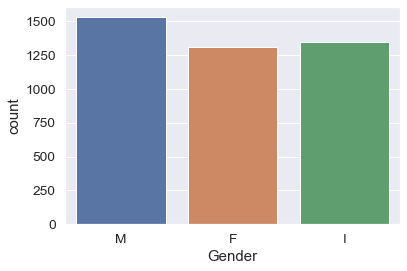

In [141]:
ab=sns.countplot(x='Gender', data=ab_visualization_nominal)
print(ab_visualization_nominal['Gender'].value_counts())

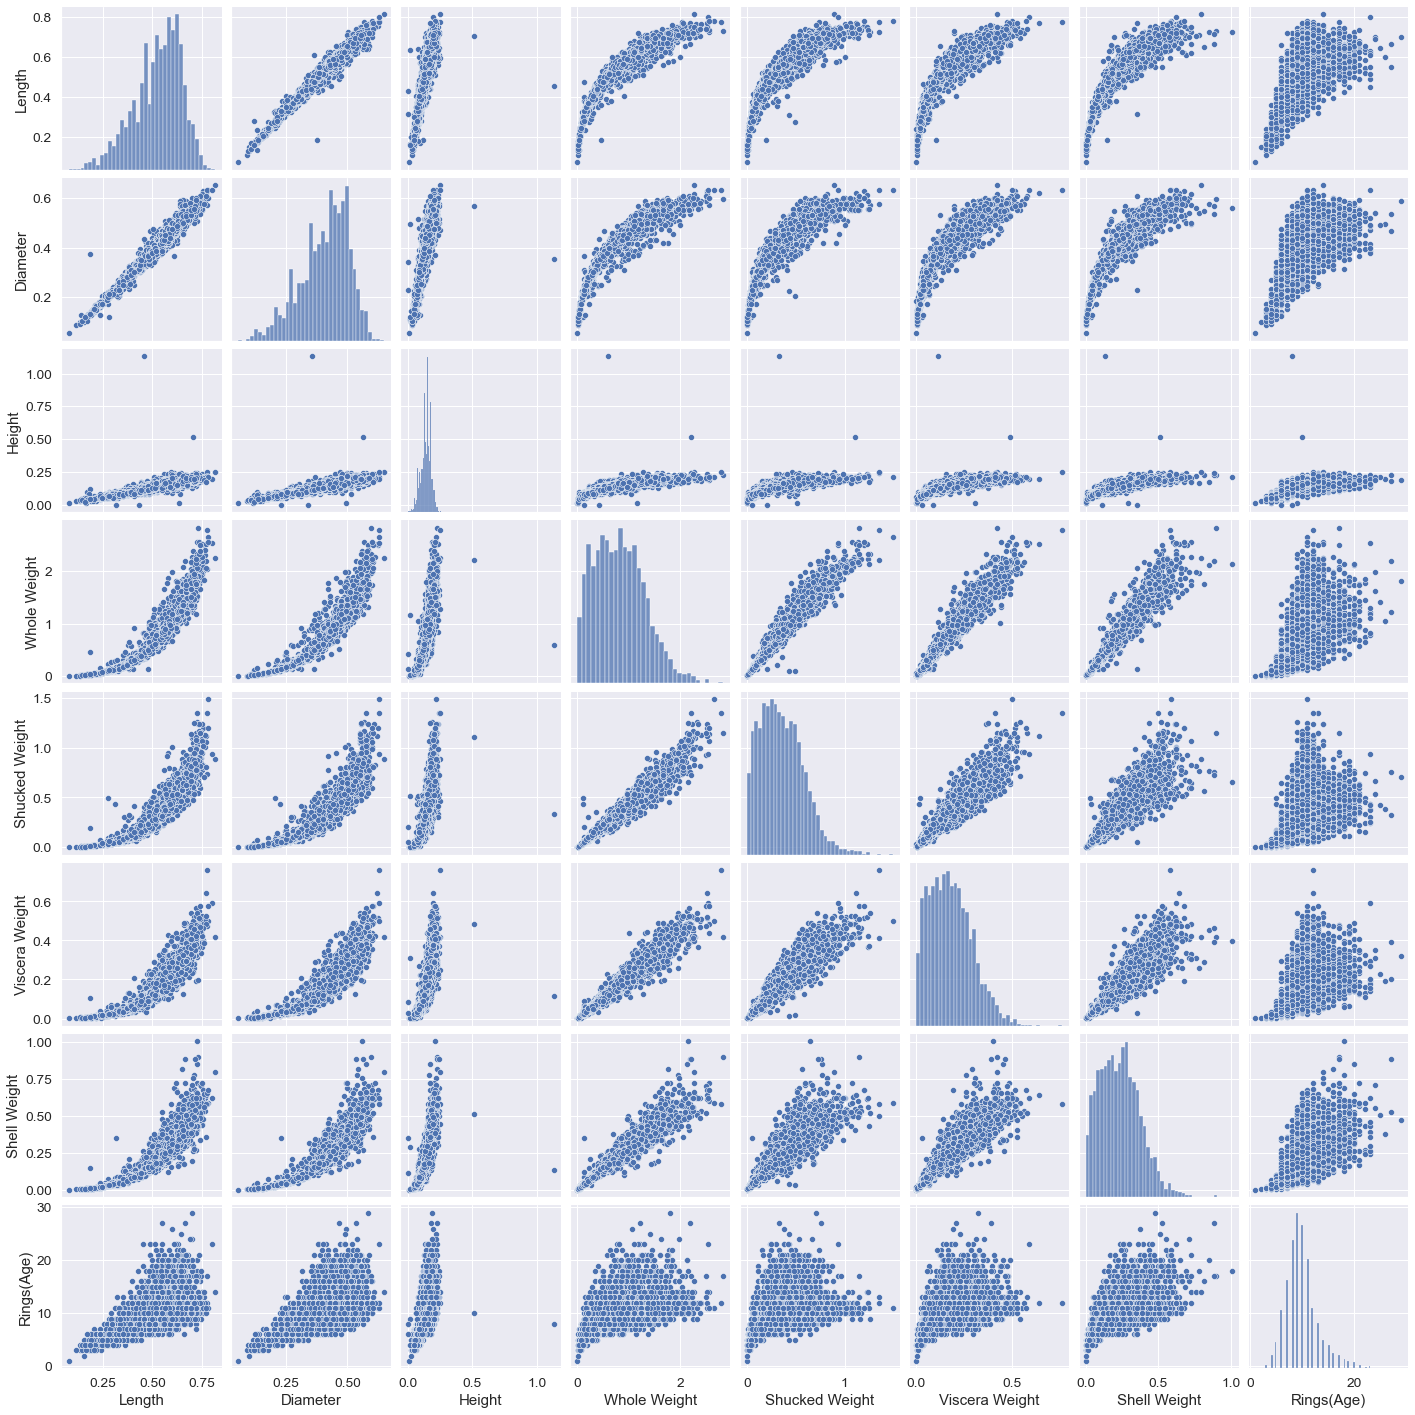

In [142]:
## data visualization

sns.pairplot(abalone)

Observations:

- Many features are highly correlated
    - length and diameter show linear correlation
    - the length and weight features are quadratic correlated
    - whole weight is linearly correlated with other weight features
- Number of Rings is positively corelated with almost all quadratic features
- Possible outliers in Height features

Scatter plot analysis also shows that data mostly cover the values for Rings from 3 to little over 20, selecting only this data in the model may be taken under consideration to increase the accuracy.

First will take a closer look at the Height outliers and then will investigate correlations between the features.

<AxesSubplot:>

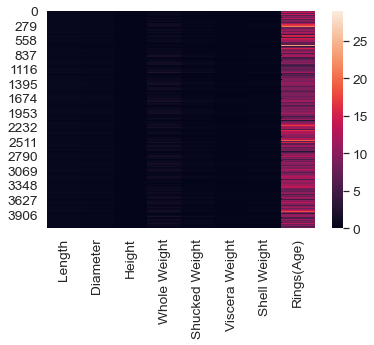

In [143]:
sns.heatmap(abalone[['Length', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings(Age)']])

Text(0.5, 1.0, 'Rings vs length and sex')

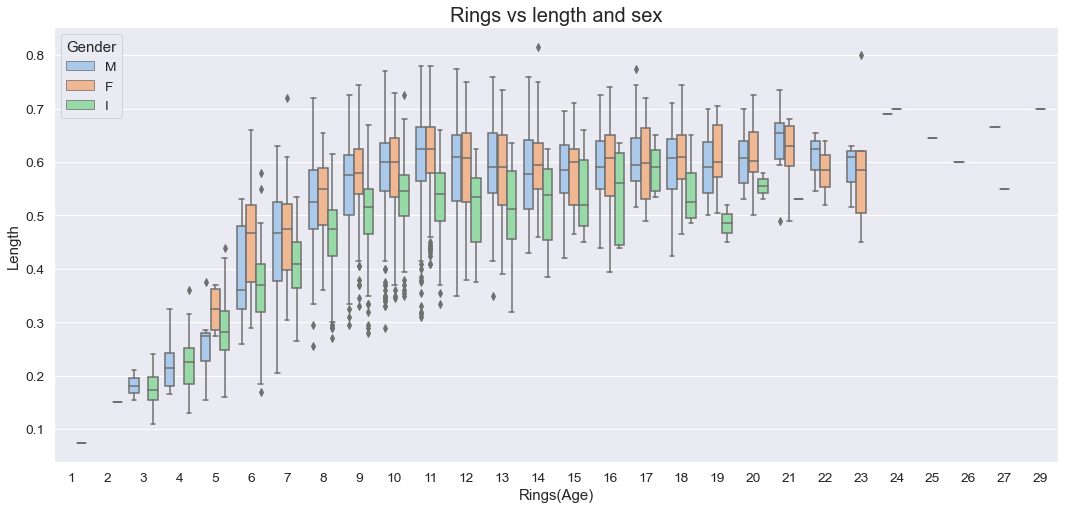

In [144]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(abalone['Rings(Age)'], abalone['Length'], hue = abalone['Gender'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs length and sex')

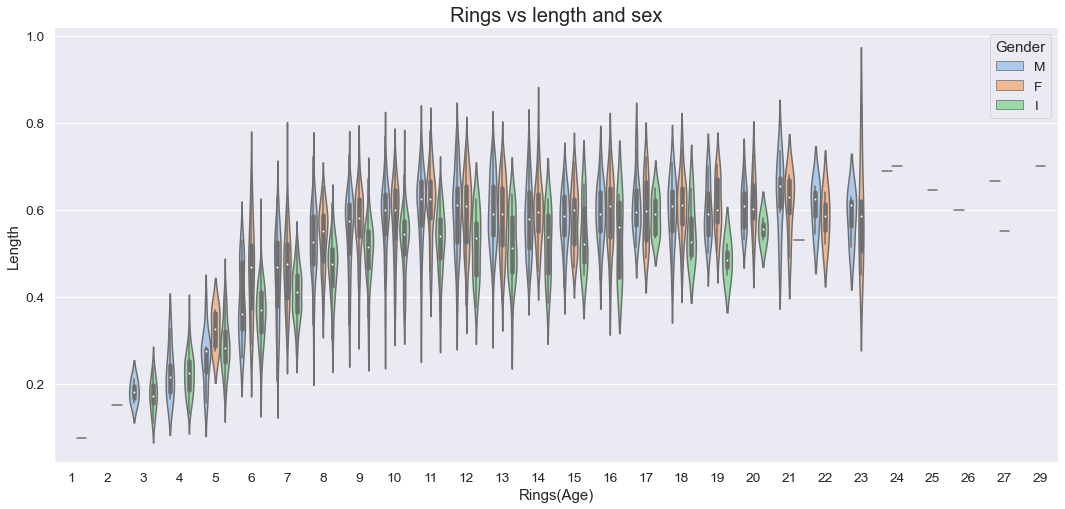

In [145]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.violinplot(abalone['Rings(Age)'], abalone['Length'], hue = abalone['Gender'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs Height and Sex')

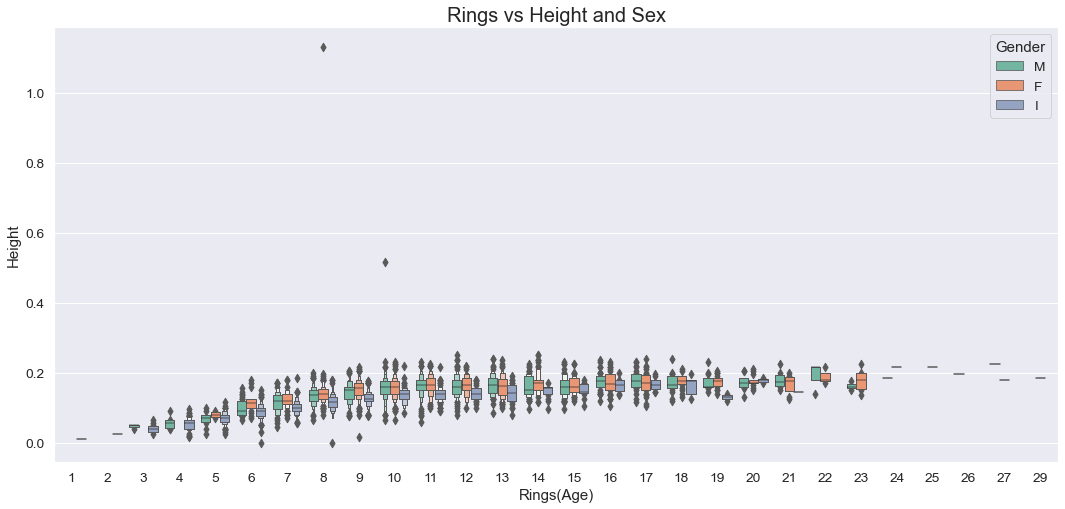

In [146]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.boxenplot(abalone['Rings(Age)'], abalone['Height'], hue = abalone['Gender'], palette = 'Set2')
plt.title('Rings vs Height and Sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs Weight')

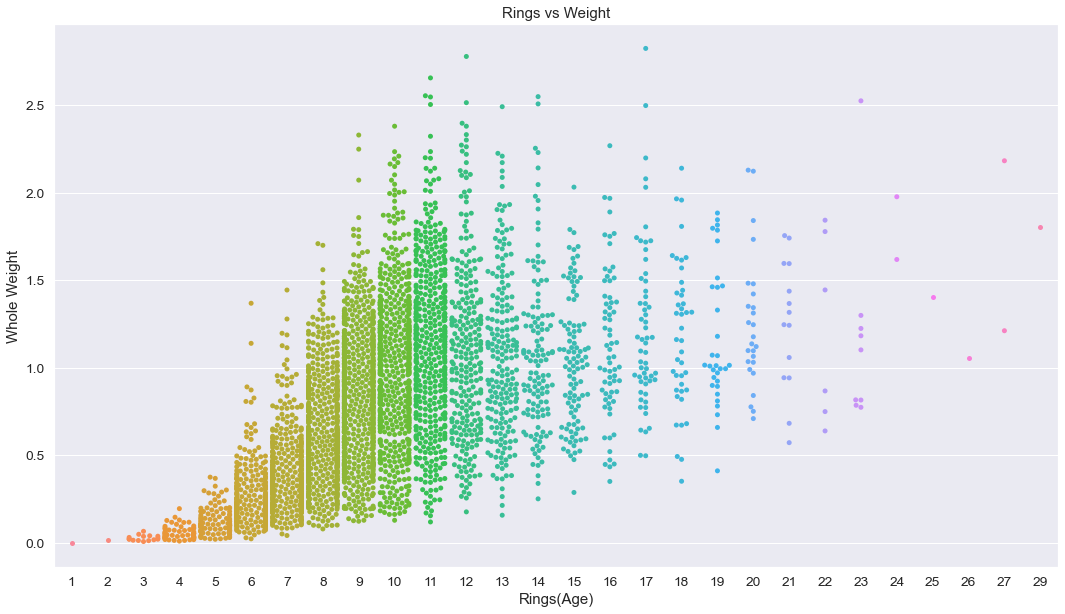

In [147]:
plt.rcParams['figure.figsize'] = (18,10)
sns.swarmplot(abalone['Rings(Age)'], abalone['Whole Weight'])
plt.title('Rings vs Weight')

Text(0.5, 1.0, 'Rings vs Shucked Weight')

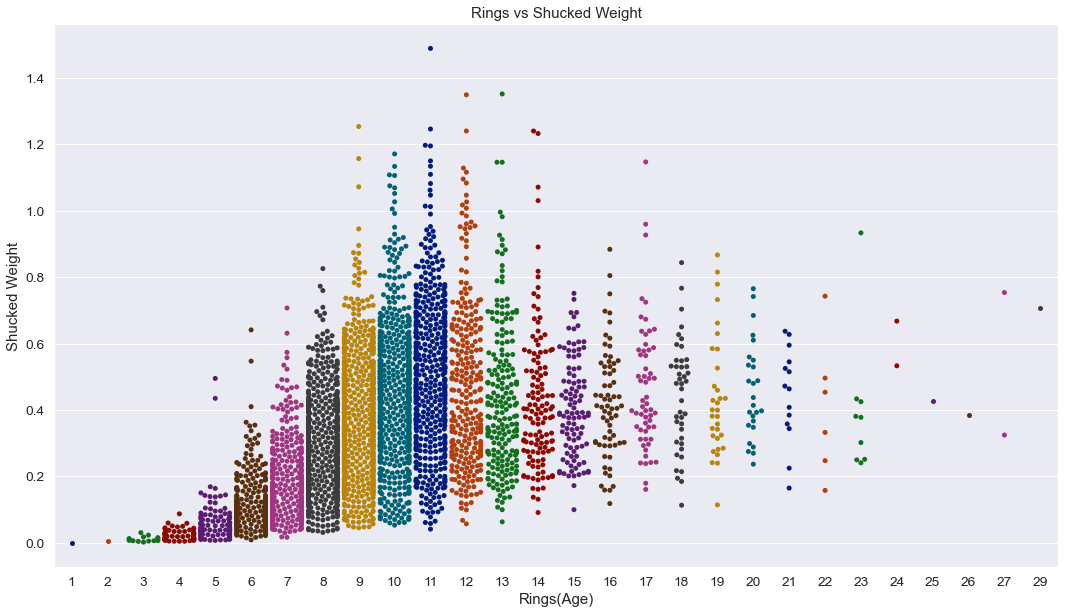

In [148]:
plt.rcParams['figure.figsize'] = (18,10)
sns.swarmplot(abalone['Rings(Age)'], abalone['Shucked Weight'], palette = 'dark')
plt.title('Rings vs Shucked Weight')

Text(0.5, 1.0, 'Rings vs Viscera Weight')

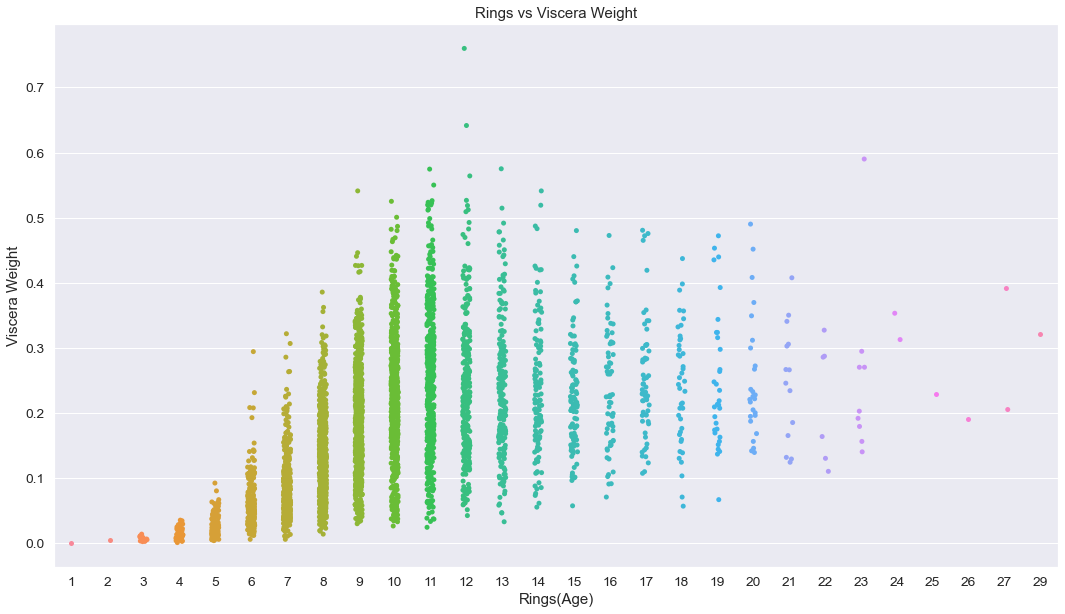

In [149]:
plt.rcParams['figure.figsize'] = (18,10)
sns.stripplot(abalone['Rings(Age)'], abalone['Viscera Weight'])
plt.title('Rings vs Viscera Weight')

Text(0.5, 1.0, 'Rings vs Shell Weight')

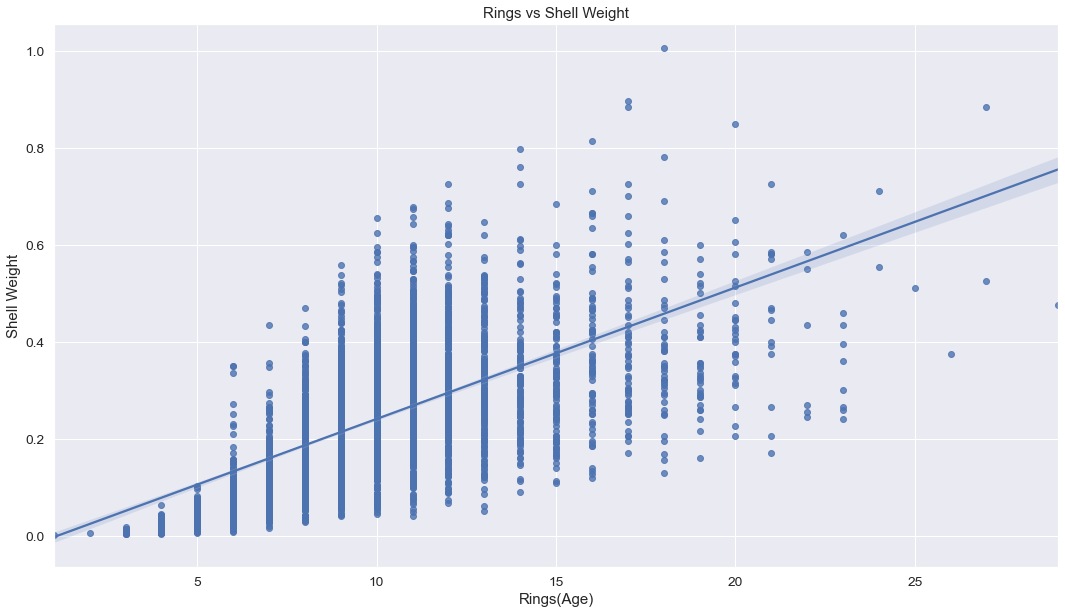

In [150]:
plt.rcParams['figure.figsize'] = (18,10)
sns.regplot(abalone['Rings(Age)'], abalone['Shell Weight'])
plt.title('Rings vs Shell Weight')

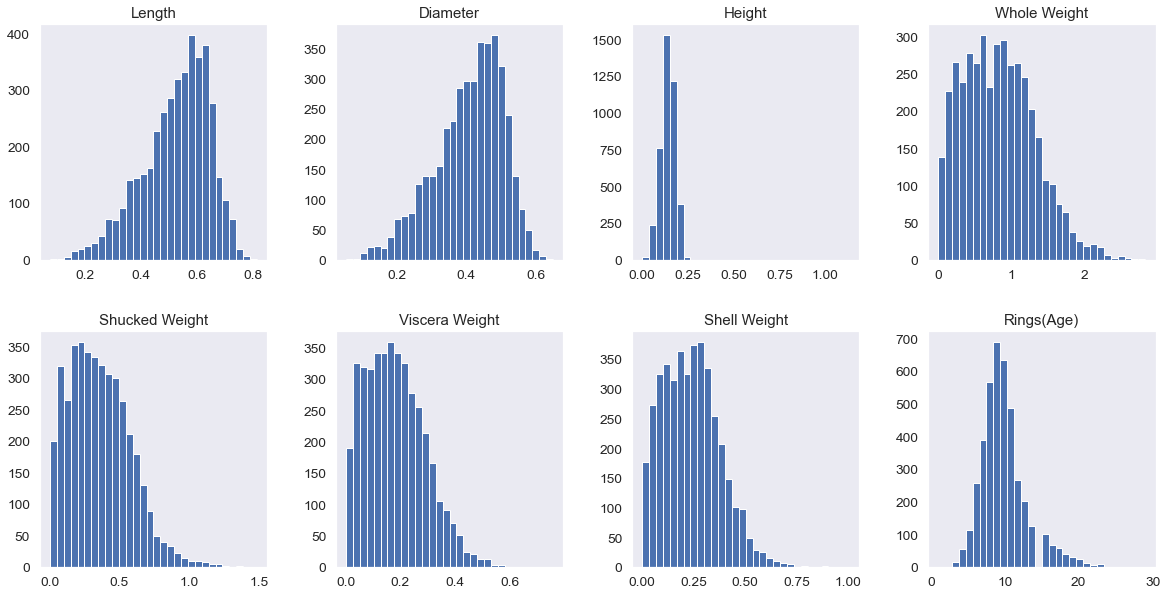

In [151]:
abalone.hist(figsize=(20,10), grid = False, layout=(2,4), bins = 30);

Histograms show that the data may be skewed, so it will be reasonable to measure it.

It also shows that there are possible outliers in Height and that there might be a strong relationship between the Diameter and Lenght and between Shell weight, Shucked weight Viscera weight and Whole weight.

In [152]:
nf = abalone.select_dtypes(include=[np.number]).columns
cf = abalone.select_dtypes(include=[np.object]).columns

skew_list = stats.skew(abalone[nf])
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings(Age),1.113702
4,Shucked Weight,0.718840
6,Shell Weight,0.620704
5,Viscera Weight,0.591640
3,Whole Weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


Skewness value points in which direction data is distorted in a statistical distribution, in Gaussian distribution the value for skewness is 0. In abalone data Height has highest skewness value followed by Rings.

High skewness in Height feature may be an outcome of outliers. I will investigate it further using scatter plots.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


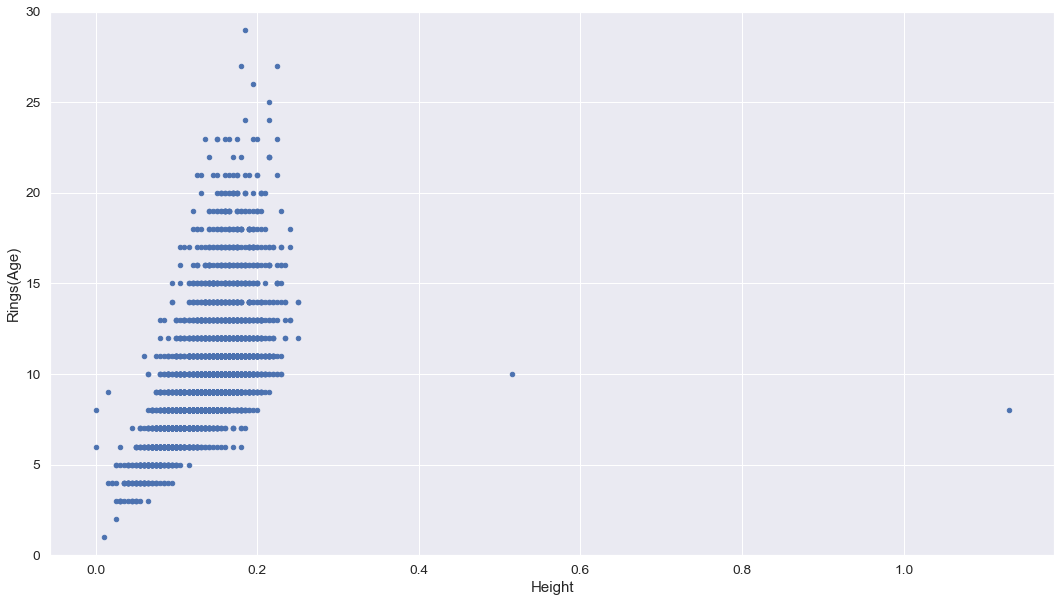

In [153]:
## Checking outliers


data = pd.concat([abalone['Rings(Age)'], abalone['Height']], axis = 1)
data.plot.scatter(x='Height', y='Rings(Age)', ylim=(0,30));

Two values seem not to follow the trend, that is why I will treat them as outliers and delete from data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


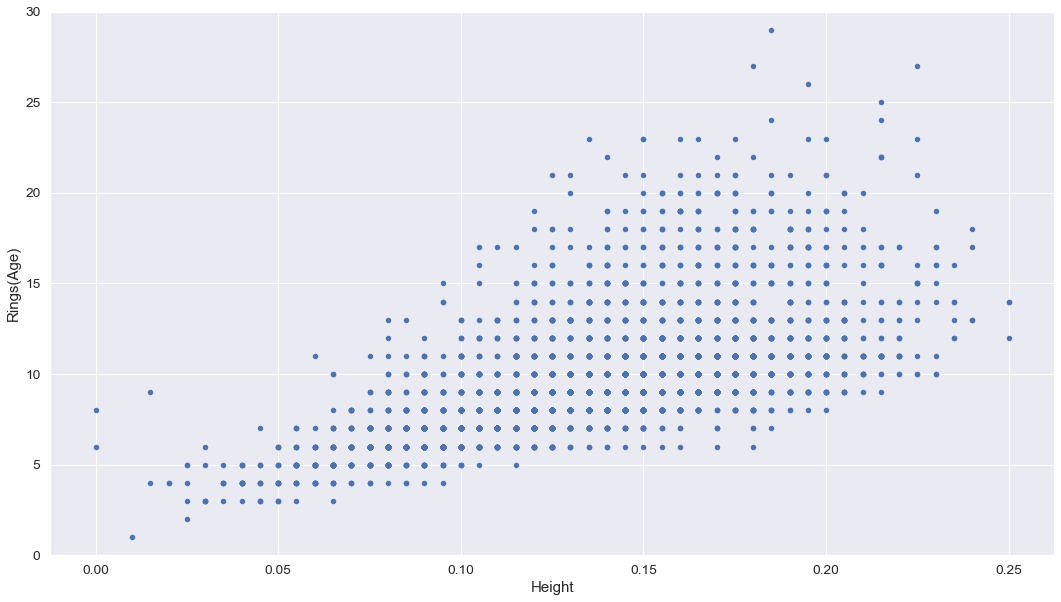

In [154]:
abalone = abalone[abalone.Height < 0.4]
data = pd.concat([abalone['Rings(Age)'], abalone['Height']], axis = 1)
data.plot.scatter(x='Height', y='Rings(Age)', ylim=(0,30));

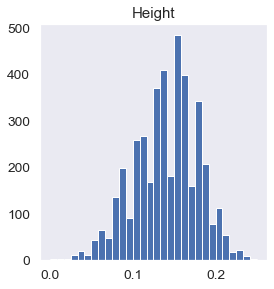

In [155]:
abalone.hist(column = 'Height', figsize=(20,10), grid=False, layout=(2,4), bins = 30);

Deleted data as suspected was the cause for the skewness of Height feature, now it is closer to a normal distribution.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


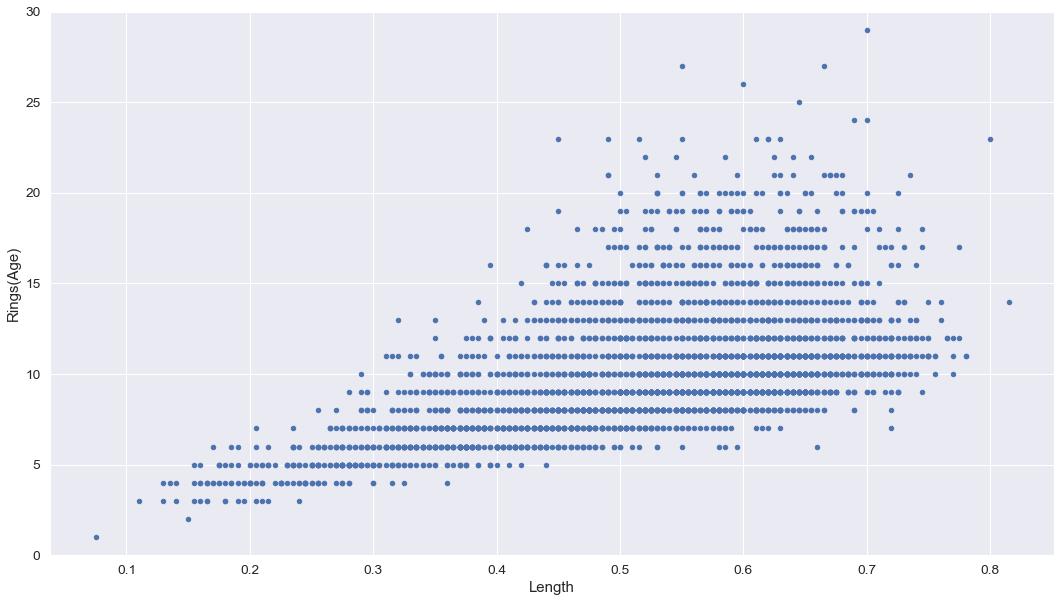

In [156]:
data = pd.concat([abalone['Rings(Age)'], abalone['Length']], axis = 1)
data.plot.scatter(x='Length', y='Rings(Age)', ylim=(0,30));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


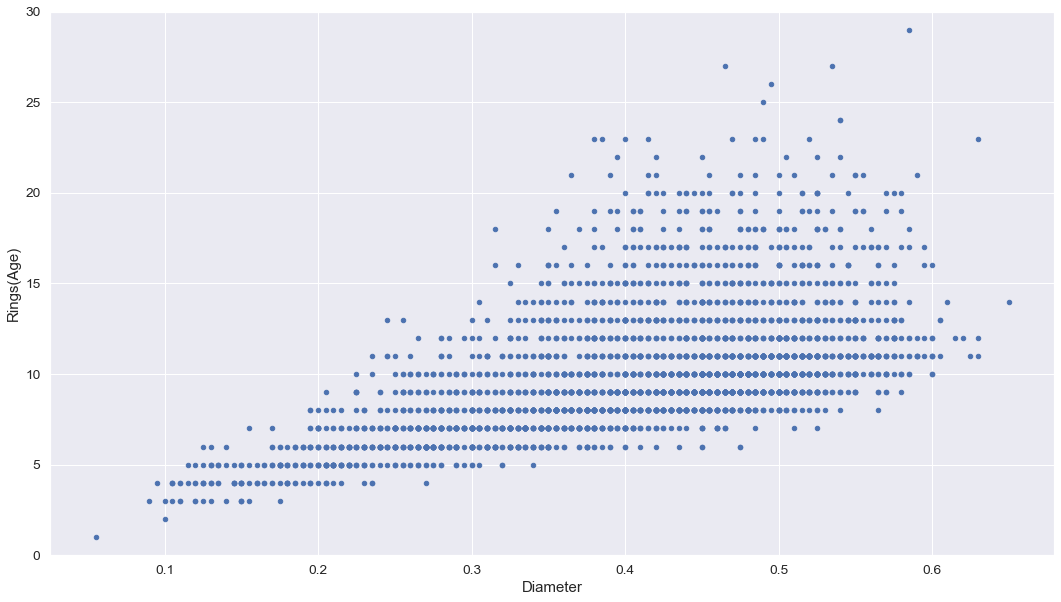

In [157]:
data = pd.concat([abalone['Rings(Age)'], abalone['Diameter']], axis = 1)
data.plot.scatter(x='Diameter', y='Rings(Age)', ylim=(0,30));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


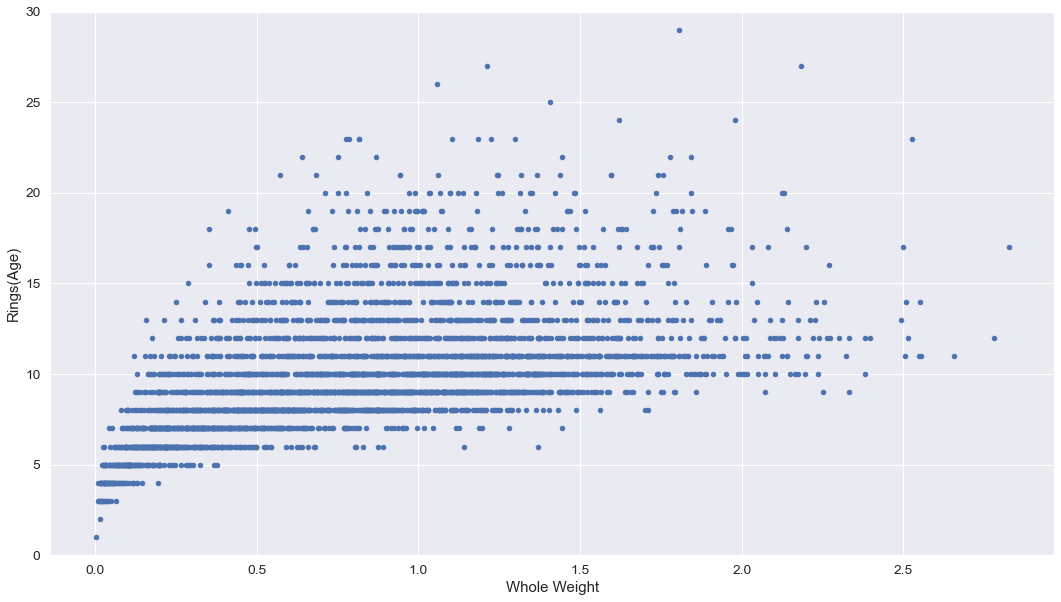

In [158]:
data = pd.concat([abalone['Rings(Age)'], abalone['Whole Weight']], axis = 1)
data.plot.scatter(x='Whole Weight', y='Rings(Age)', ylim=(0,30));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


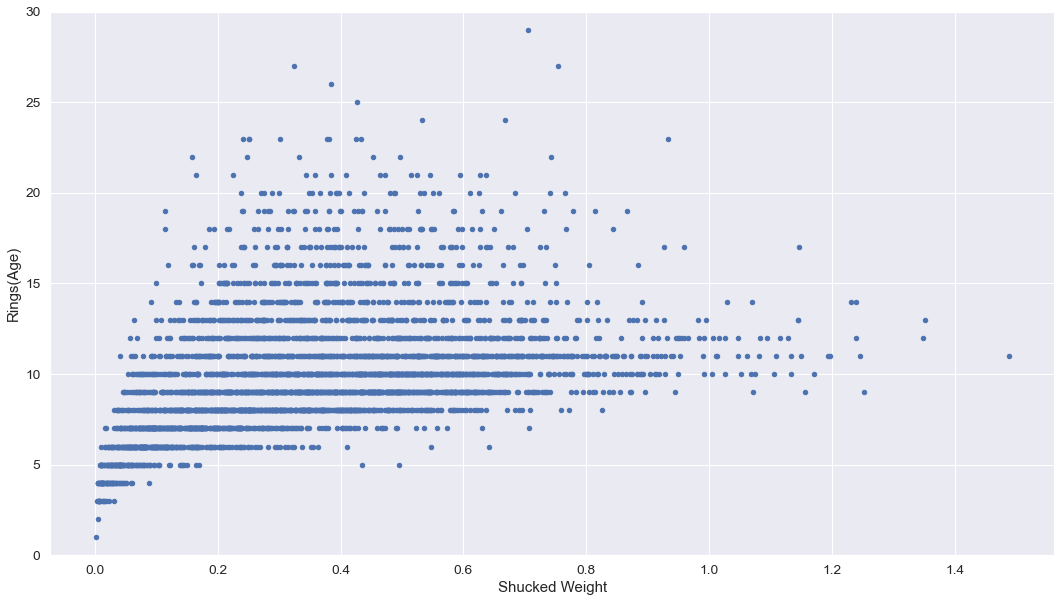

In [159]:
data = pd.concat([abalone['Rings(Age)'], abalone['Shucked Weight']], axis = 1)
data.plot.scatter(x='Shucked Weight', y='Rings(Age)', ylim=(0,30));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


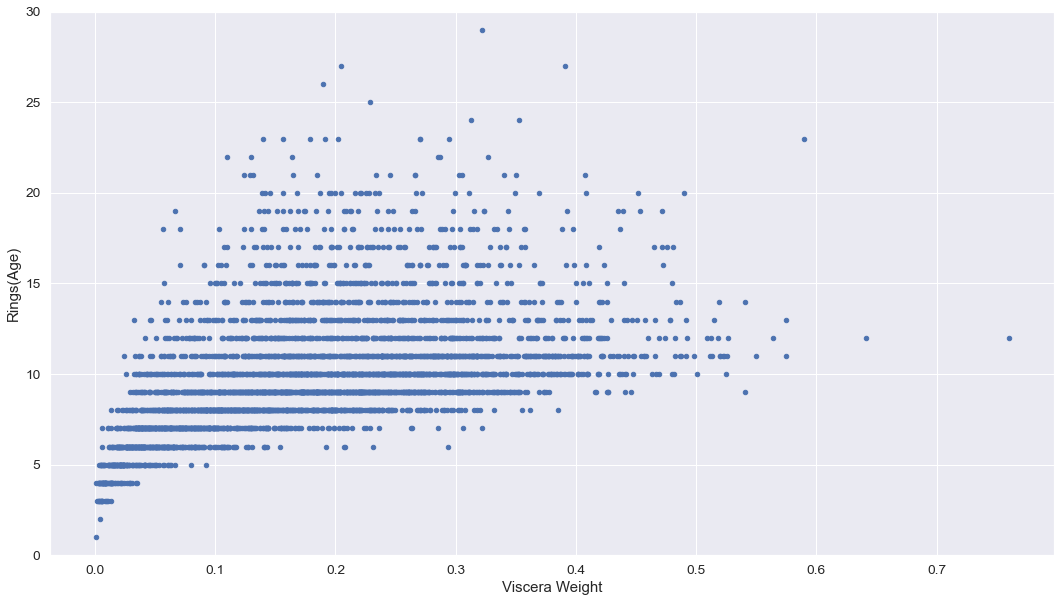

In [160]:
data = pd.concat([abalone['Rings(Age)'], abalone['Viscera Weight']], axis = 1)
data.plot.scatter(x='Viscera Weight', y='Rings(Age)', ylim=(0,30));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


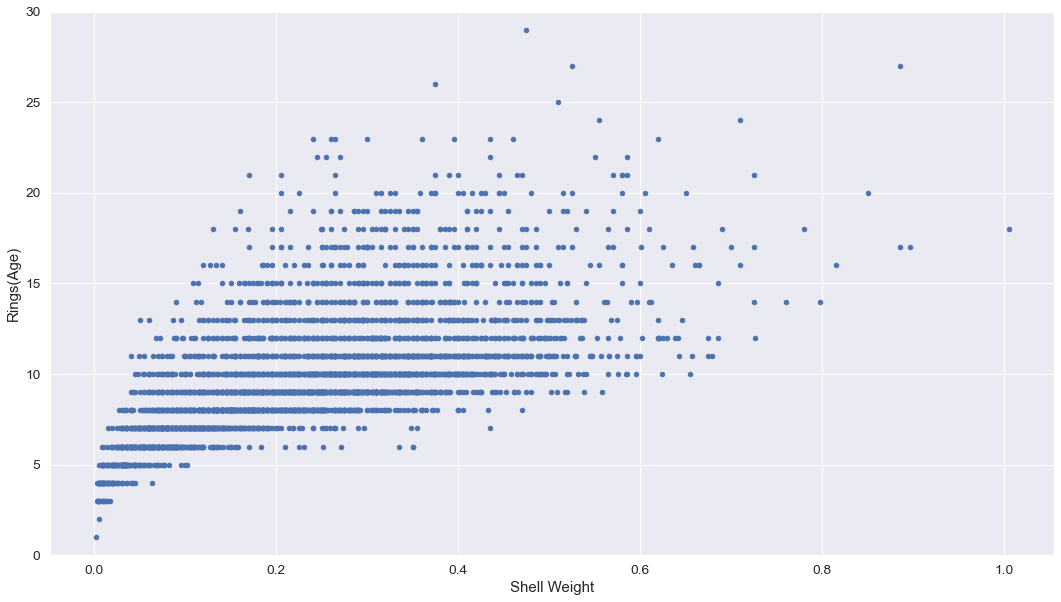

In [161]:
data = pd.concat([abalone['Rings(Age)'], abalone['Shell Weight']], axis = 1)
data.plot.scatter(x='Shell Weight', y='Rings(Age)', ylim=(0,30));

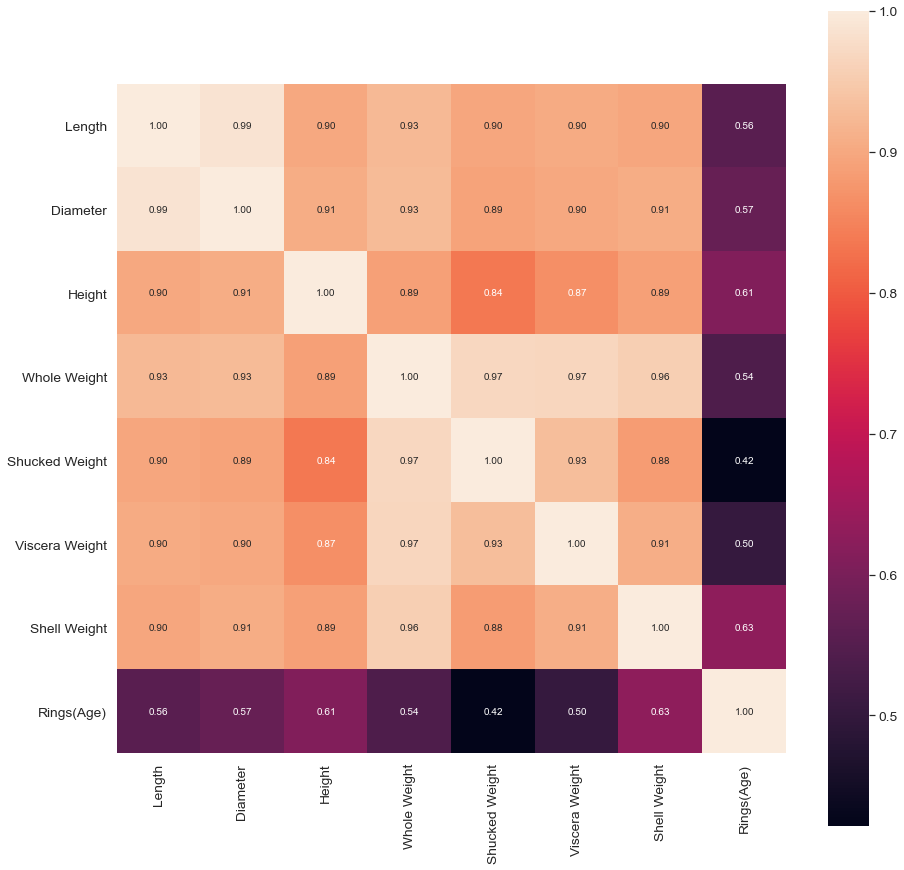

In [162]:
##Correlation Matrix

corrmat = abalone.corr()
cols = corrmat.nlargest(8, 'Rings(Age)')['Rings(Age)'].index
cm = np.corrcoef(abalone[nf].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=nf.values, xticklabels=nf.values)
plt.show();

The heat map shows that features are highly correlated and multicollinearity is possible.

-Whole weight is almost linearly correlated with all the features except Rings
-Length is linearly correlated with Diameter
-From all the features excluding Rings, Height is least correlated with other features
-Rings feature has the highest correlation with Shell Weight followed by Height, Length and Diameter

Possible solutions for a high level of collinearity in data:

- Use principal component analysis(PCA) to generate new features
- Select partial features for modelling

## Categorical Feature

Finally the relation of Rings with the Sex feature will be analysed

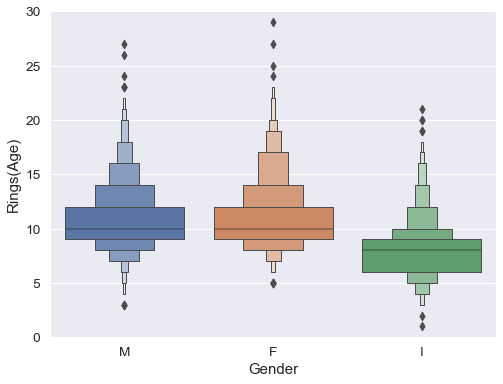

In [163]:
data = pd.concat([abalone['Rings(Age)'], abalone['Gender']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Gender', y="Rings(Age)", data=abalone)
fig.axis(ymin=0, ymax=30);

-Distribution between Male and Female is similar
-Most of the Rings both for Male and Female are between 8 and 19
-Infants have mostly from 5 to 10 Rings

The plot also shows that Rings majority lies between 3 to 22, as mentioned previously.

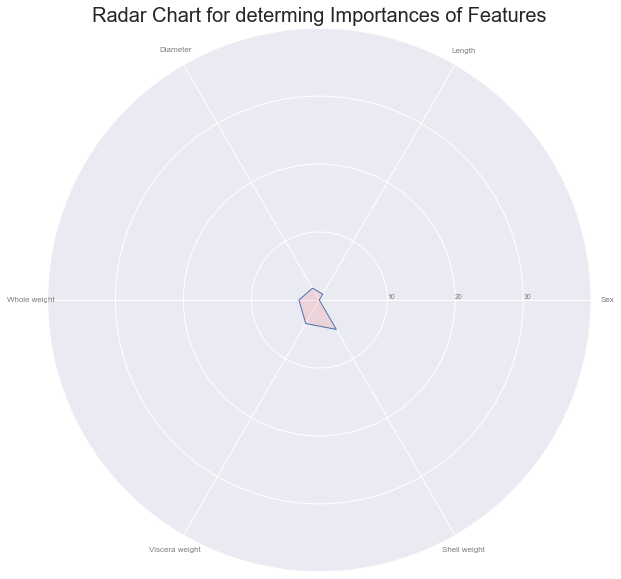

In [165]:
from math import pi

# Set data
df = pd.DataFrame({
'group': [i for i in range(0, 4175)],
'Sex': abalone['Gender'],
'Length': abalone['Length'],
'Diameter': abalone['Diameter'],
'Whole weight':  abalone['Whole Weight'],
'Viscera weight': abalone['Viscera Weight'],
'Shell weight': abalone['Shell Weight']
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
plt.title('Radar Chart for determing Importances of Features', fontsize = 20) 
# Fill area
ax.fill(angles, values, 'red', alpha=0.1)

In [166]:
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
abalone['Sex'] = le.fit_transform(abalone['Gender'])

abalone['Sex'].value_counts()
'''

data = pd.get_dummies(abalone)
data

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings(Age),Gender_F,Gender_I,Gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [167]:
df.head()

,group,Sex,Length,Diameter,Whole weight,Viscera weight,Shell weight
0,0,M,0.455,0.365,0.5140,0.1010,0.150
1,1,M,0.350,0.265,0.2255,0.0485,0.070
2,2,F,0.530,0.420,0.6770,0.1415,0.210
3,3,M,0.440,0.365,0.5160,0.1140,0.155
4,4,I,0.330,0.255,0.2050,0.0395,0.055


## Linear Regression Models
First lets will transofrm Gender feature

In [168]:
abalone = pd.get_dummies(abalone)
abalone.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings(Age),Gender_F,Gender_I,Gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [169]:
## setting labels

X = abalone.drop(['Rings(Age)'], axis = 1)
y = abalone['Rings(Age)']

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

## Linear regression

In [171]:
from sklearn.linear_model import LinearRegression 
paramLin = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
LinearReg = GridSearchCV(LinearRegression(),paramLin, cv = 10)
LinearReg.fit(X = X_train,y= y_train)
LinearRegmodel = LinearReg.best_estimator_
print(LinearReg.best_score_, LinearReg.best_params_)

0.5291894706642761 {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [172]:
LinearReg.score(X_train,y_train)

0.5395116555093835

In [173]:
LinearReg.score(X_test,y_test)

0.5505459961987561

Text(0, 0.5, 'Predictions')

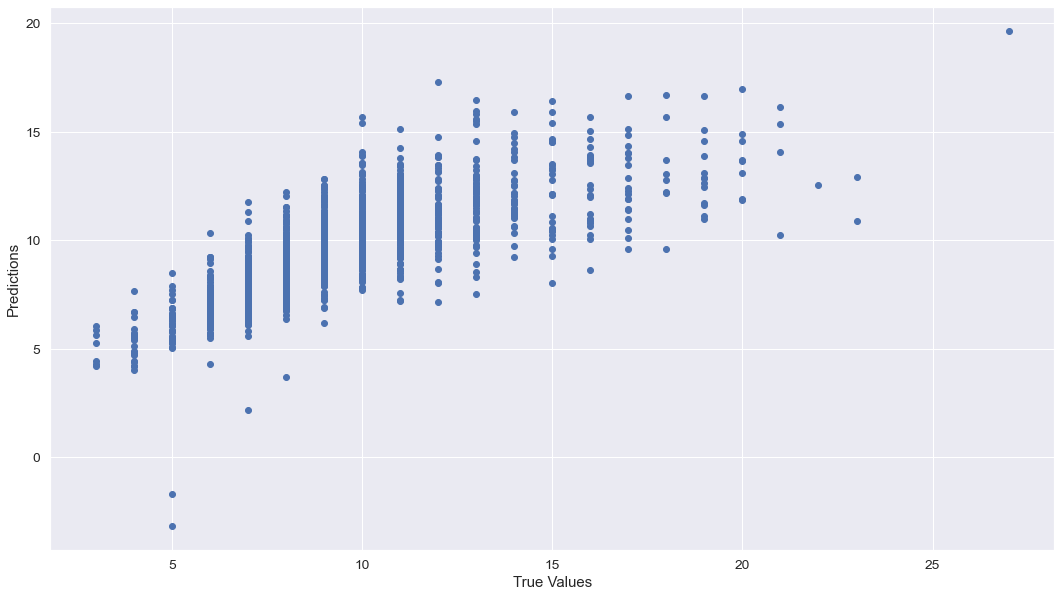

In [174]:
predictions = LinearReg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Ridge regression

In [175]:
from sklearn.linear_model import Ridge
paramsRidge = {'alpha':[0.01, 0.1, 1,10,100], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridgeReg = GridSearchCV(Ridge(),paramsRidge, cv = 10)
ridgeReg.fit(X = X_train,y= y_train)
Rmodel = ridgeReg.best_estimator_
print(ridgeReg.best_score_, ridgeReg.best_params_)

0.5293180523102097 {'alpha': 0.01, 'solver': 'sparse_cg'}


In [176]:
ridgeReg.score(X_train,y_train)

0.5395024951975276

In [177]:
ridgeReg.score(X_test,y_test)

0.5507040554055808

Text(0, 0.5, 'Predictions')

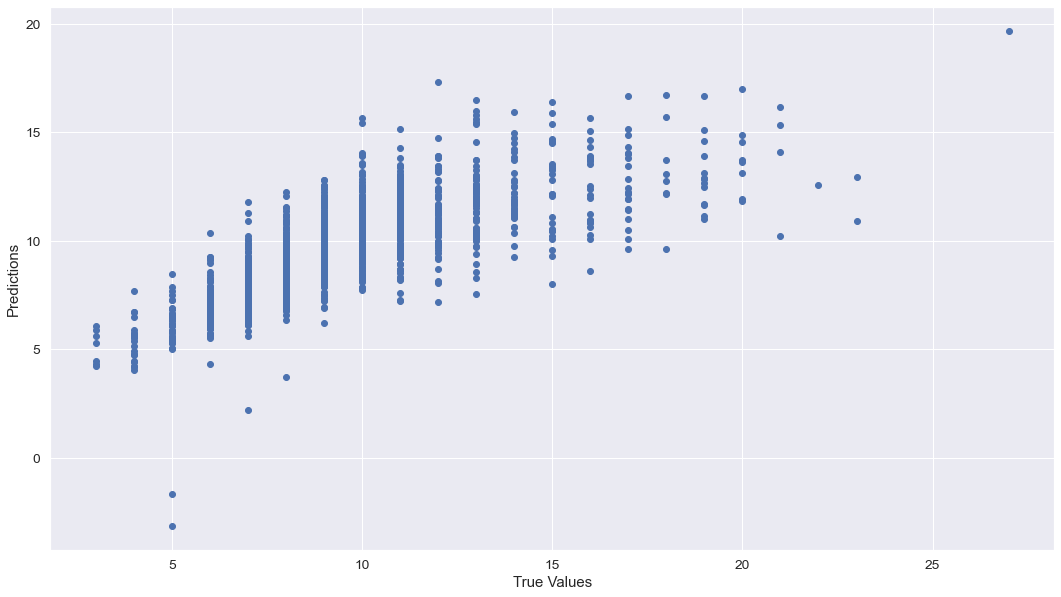

In [178]:
predictions = ridgeReg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## K-means

In [179]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [180]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
y_kmeans = kmeans.predict(X_std)

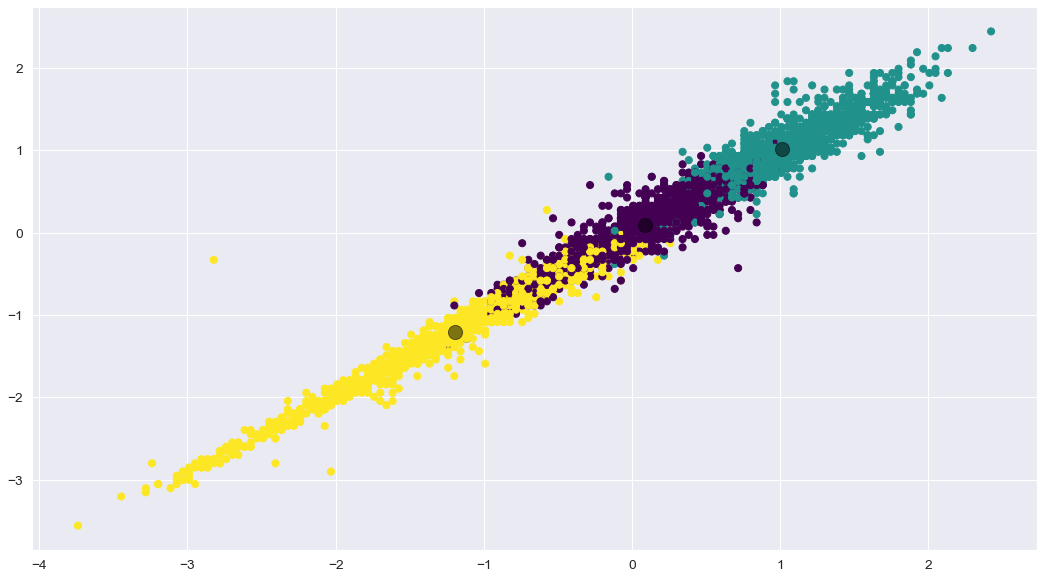

In [181]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [182]:
## PCA

corr_mat = np.corrcoef(X_std.T)

In [183]:
eigenvalues, eigenvectors = np.linalg.eig(corr_mat)
print('\nEigenvalues \n%s' %eigenvalues)


Eigenvalues 
[ 7.04052424e+00  1.51954490e+00  9.11893671e-01  2.12328573e-01
  1.38859281e-01  9.44148478e-02  6.31619954e-02  1.26113958e-02
  6.66109848e-03 -8.74433529e-16]


In [184]:
#eigenvalue and eigenvector pairs
pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
pairs.sort(key = lambda x: x[0], reverse = True)

In [185]:
sorted_eigenval = []
for i in pairs:
    sorted_eigenval.append(i[0])
print(sorted_eigenval)

[7.04052424123647, 1.5195448960958338, 0.9118936706973582, 0.21232857318459825, 0.1388592813692537, 0.09441484775943165, 0.06316199536709335, 0.012611395805216752, 0.006661098484745975, 8.744335285919732e-16]


In [186]:
total = sum(eigenvalues)
variance_explained = [(i/total)*100 for i in sorted_eigenval]

In [187]:
variance_explained

[70.40524241236469,
 15.195448960958336,
 9.11893670697358,
 2.123285731845982,
 1.388592813692537,
 0.9441484775943164,
 0.6316199536709335,
 0.1261139580521675,
 0.06661098484745974,
 8.74433528591973e-15]

In [188]:
cum_variance_explained = np.cumsum(variance_explained)
cum_variance_explained

array([ 70.40524241,  85.60069137,  94.71962808,  96.84291381,
        98.23150663,  99.1756551 ,  99.80727506,  99.93338902,
       100.        , 100.        ])

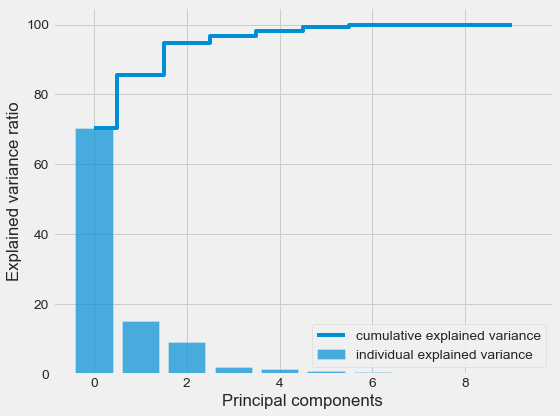

In [189]:
#Plot variance explained by the principal components
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 6))
    plt.bar(range(10), variance_explained, alpha=0.7, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_variance_explained, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout();

From the above plot we see that the first three principal components can explain over 98% of the variation of the feature variables. We may project the original features from the 10-dimensional space to a 3-dimensional space.

In [190]:
projection_mat = np.hstack((pairs[0][1].reshape(10,1),
                           pairs[1][1].reshape(10,1),
                           pairs[2][1].reshape(10,1)))

In [191]:
X_new = X_std.dot(projection_mat)
X_new.shape

(4175, 3)

In [192]:
X = abalone.drop(['Rings(Age)'], axis = 1)
y = abalone['Rings(Age)']

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [194]:
## KNN

from sklearn.neighbors import KNeighborsClassifier
paramsKn = {'n_neighbors':range(1,30)}
Kneighbours = GridSearchCV(KNeighborsClassifier(),paramsKn, cv=10)

Kneighbours.fit(X=X_train,y=y_train)
Kmodel = Kneighbours.best_estimator_
print(Kneighbours.best_score_, Kneighbours.best_params_)

0.2724550898203593 {'n_neighbors': 29}


In [195]:
## SVM

from sklearn.svm import SVC
paramsSvm = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                  'C':[0.1,1,10],'gamma':[0.01,0.1,0.5,1,2]}

Svm = GridSearchCV(SVC(),paramsSvm,cv=5)

Svm.fit(X_train,y_train)
model_svm = Svm.best_estimator_
print(Svm.best_score_,Svm.best_params_)

0.2790419161676646 {'C': 10, 'gamma': 2, 'kernel': 'rbf'}


Classification is finished

In [196]:
# splitting the dependent and independent variables

y = data['Rings(Age)']
data = data.drop(['Rings(Age)'], axis = 1)
x = data

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4175, 10)
Shape of y: (4175,)


In [197]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3340, 10)
Shape of x_test : (835, 10)
Shape of y_train : (3340,)
Shape of y_test : (835,)


In [198]:
## Scaling the data using Min-Max Scaler:¶


from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Find the beset random_State use here (currently we are moving ahead with random_state 12)

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

In [200]:
lr.fit(x_train,y_train)

LinearRegression()

In [201]:
pred_test=lr.predict(x_test)

In [202]:
print(r2_score(y_test,pred_test))

0.5652273854786584


## Regularization

In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [204]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [205]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.2098554228970742

## Ensemble technique

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [207]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 55.13283346722802
Cross Val Score: 44.421908245835326


In [208]:
# MODELLING
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

RMSE : 2.625759086139304
R2 Score : 0.3637781592415783


In [209]:
!pip install eli5

In [210]:
# let's check the importance of each attributes


#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0400 ± 0.0205,Shell Weight
0.0369 ± 0.0113,Shucked Weight
0.0242 ± 0.0124,Diameter
0.0211 ± 0.0147,Length
0.0034 ± 0.0070,Gender_F
0.0029 ± 0.0052,Viscera Weight
0.0024 ± 0.0161,Height
0.0010 ± 0.0144,Whole Weight
0.0005 ± 0.0116,Gender_I
-0.0005 ± 0.0113,Gender_M
